In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

np.random.seed(0)



In [2]:
#Importing data
from keras.datasets import mnist
(X_train , Y_train),(x_test,y_test)=mnist.load_data()


We divide data in 2 sets
Set to train the neural network model
X_train contain values 
Y_train contains labels
Set to test the model
x_test
y_test

In [3]:
print(X_train.shape,Y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


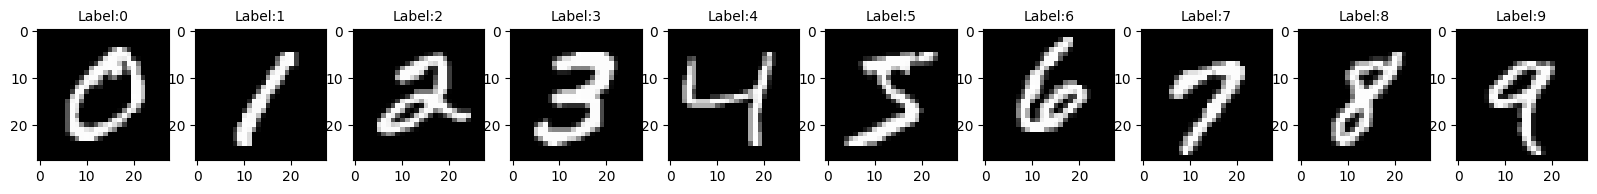

In [4]:
#Preview of the data

numbers=10
f,ax=plt.subplots(1,numbers,figsize=(20,20))

for i in range(0,numbers):
    sample=X_train[Y_train==i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Label:{}".format(i),fontsize=10)


In [5]:
#this will convert label integers to binary class matrix
#because we cannot directly feed the integrer value to the network
Y_train=keras.utils.to_categorical(Y_train,numbers)
y_test=keras.utils.to_categorical(y_test,numbers)

In [6]:
#preview of class matrix
for i in range(10):
    print(Y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Normalising data by dividing the values by 255
because all the data in the matrix will be in range 0(black) to 255(white)

In [7]:
X_train=X_train/255
x_test=x_test/255

Reshaping data to pass the data as one vector

In [8]:
X_train=X_train.reshape(X_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(X_train.shape)

(60000, 784)


Now creating Neural Network model

In [9]:
model = Sequential()
#Using ReLU which will directly output the input if positive values or else will output zero
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25)) #To prevent overfitting we do dropout regularization
model.add(Dense(units=10, activation='softmax')) # we use softmax function to findout probablities 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Now training the model

In [10]:
batch_size = 512
epochs=10
model.fit(x=X_train, y=Y_train, batch_size=batch_size, epochs=epochs)
     

Epoch 1/10
118/118 [==============================] - 2s 7ms/step - loss: 0.5951 - accuracy: 0.8288
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2215 - accuracy: 0.9361
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1601 - accuracy: 0.9529
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1291 - accuracy: 0.9628
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1062 - accuracy: 0.9684
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0905 - accuracy: 0.9730
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0786 - accuracy: 0.9759
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0704 - accuracy: 0.9788
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0601 - accuracy: 0.9820
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0540 - accuracy: 0.9834

Testing the Accuracy of the model

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test loss:{} , Test accuracy:{}".format(test_loss,test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.0745 - accuracy: 0.9770
Test loss:0.07452109456062317 , Test accuracy:0.9769999980926514


We now use the Test dataset to predict the probabilities

In [12]:
y_pred=model.predict(x_test) # this returns the values of probabilites of the label in a matrix
y_pred_numbers=np.argmax(y_pred,axis=1) #this function returns the index value of highest probability entry in the matrix
print(y_pred)
print(y_pred_numbers)

313/313 [==============================] - 0s 1ms/step
[[1.1304287e-06 1.2227500e-06 2.9430573e-04 ... 9.9879372e-01
  4.9019973e-06 1.2017531e-05]
 [6.0408217e-07 2.0403045e-04 9.9961734e-01 ... 6.4940245e-08
  6.1464816e-05 4.3937396e-09]
 [9.3884610e-06 9.9776101e-01 2.9410099e-04 ... 9.8089210e-04
  4.1141023e-04 4.9907599e-06]
 ...
 [8.5777607e-10 2.8056546e-09 1.7141367e-09 ... 1.7278488e-06
  6.3461283e-07 9.4365328e-07]
 [1.1119596e-09 6.8696129e-09 1.8496832e-12 ... 5.6191423e-11
  3.2542299e-05 5.0845204e-09]
 [1.9741030e-08 1.4981655e-11 5.8827196e-09 ... 8.3944261e-13
  5.1243371e-10 3.2159156e-10]]
[7 2 1 ... 4 5 6]


Finally Testing out to Predict the Numbers

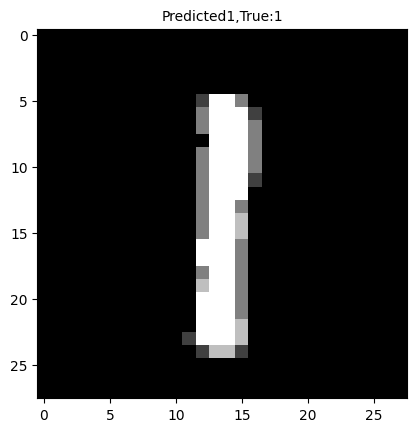

In [24]:
random_index=np.random.choice(len(x_test))
x_sample=x_test[random_index]
y_true=np.argmax(y_test,axis=1)
y_sample_true=y_true[random_index]
y_sample_pred_class=y_pred_numbers[random_index]

plt.title("Predicted{},True:{}".format(y_sample_pred_class,y_sample_true),fontsize=10)
plt.imshow(x_sample.reshape(28,28),cmap='gray')